## Analyze A/B Test Results


This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the csv and use .head() function to have a quick look in the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#use '.shape' function to find the number of rowls in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#use .nunique() to find the sum of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#find the sum of all converted
df['converted'].value_counts()[1]

35237

In [6]:
#sum all converted values and divide for all columns
df['converted'].value_counts()[1]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#find the quantity of rows that the new_page and tratment dont match
df[((df['landing_page'] == 'new_page') != (df['group'] == 'treatment'))].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
#see if there is any rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#create a new dataset and store in df2
df2 = df

In [10]:
#find the rows where treatment does not match with new_page or control does not match with old_page
df2.loc[(df2['landing_page'] == 'new_page') != (df2['group'] == 'treatment')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


In [11]:
#drop the columns that dont match
df2.drop(df2.loc[(df2['landing_page'] == 'new_page') != (df2['group'] == 'treatment')].index, inplace=True)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#use .nunique() functioin to find the numbers of unique ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#find the duplicated user_id
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
#print the duplicated row
print(df2[df2['user_id'].duplicated()])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#drop the duplicated row
df2.drop(df2[df2['user_id'].duplicated()].index, inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#count all individuals converted and divide for all individual to find the probability
df2[df2['converted']==1].count()/df2.shape[0]

#alternatively
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#count all individuals in the control group and was converted then divide for all individual in the control group to find de probability
df2[(df2['group'] == 'control') & (df2['converted'] == 1)].count()[0]/df2[df2['group'] == 'control']['converted'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#count all individuals in the treatment group and was converted then divide for all individual in the treatment group to find de probability
df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)].count()[0]/df2[df2['group'] == 'treatment']['converted'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
#count all rows that contains 'new_page' in the column'landing page' and divide for all columns
df2[df2['landing_page'] == 'new_page'].count()[0]/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The probability of a person receive a new or old page is 0.500, its suggests that there is an equal chance to receive both pages.
I will probably run more tests to confirm if this new page leads equal convertions than the old page.**

In [21]:
#compute the duration of this experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

**Took 21 days to complete this experiment.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$p_{old}$** - **$p_{new}$**  >= 0 

**$p_{old}$** - **$p_{new}$**  < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
#conversion rate
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
#conversion rate is the same for both pages
p_old = df2.converted.mean() 
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
#store number of individual in treatment group in n_new
n_new = df2[df2['group']=='treatment'].count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
#store number of individual in control group in n_old
n_old = df2[df2['group']=='control'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#Simulation of transactions in randon binomial function
new_page_converted = np.random.binomial(1,p_new,n_new) 
new_page_converted.mean()

0.1205285252219393

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#Simulation of transactions in randon binomial function
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11991133995071382

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#probabilty of new and old page based upon simulated values 
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

0.00061718527122547884

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
#bootstrap 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  
    old_page_converted = np.random.binomial(1,p_old,n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

In [30]:
#convert p_diffs to numpy array 
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

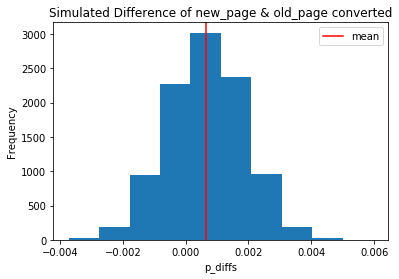

In [31]:
#plot histogram with labels
plt.hist(p_diffs)
plt.axvline(p_diffs.mean(), color='red', label='mean')
plt.legend()
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference of new_page & old_page converted');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
#compute the proportions to find the p-value
diff = df2.converted[df2['group'] == 'treatment'].mean() - df2.converted[df2['group'] == 'control'].mean()
(diff < p_diffs).mean()

0.9647

k. Explain what was computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The results find in 'j' part is called p-value. P-value is the probability of obtaining a test statistic equal to or more extreme than that observed in a sample, under the null hypothesis**

**In this case, this p-value is extremely large and we can affirm we failed to reject null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
#Import necessary packages and prepare data to compute de z-score and p-value
import statsmodels.api as sm

convert_old = df2[df2.group == 'control']['converted'].sum()
convert_new = df2[df2.group == 'treatment']['converted'].sum()
n_old = df2[df2.group == 'control']['converted'].count()
n_new = df2[df2.group == 'treatment']['converted'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
#compute z_score and p_value using sm.stats.proportions_ztest() function
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value in the previous question is 0.905 and the z-score is 1.31.**

**The z-score is the number of standard deviations by which the value of a raw score is above the mean value. In this case, the z-score is in the right side.**

**In both cases there is a confirmation that we failed to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this case we want to predict something that have two possible outcomes, for that, we will use a Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#create a new df
df3=df2

In [36]:
#use pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df3[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df3['landing_page'])
df3[['ab_page_control','ab_page']] = pd.get_dummies(df3['group'])
df3.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)
df3.head()

,user_id,timestamp,group,landing_page,converted,landing_page_new,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
#fit the model, compute the regression and show the summary results
df3['intercept'] = 1

logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-27 12:34 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [39]:
# interpreting the coefficients
1/np.exp(results.params[1])

#alternative
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**For each 1 unit decrease in ab_page_treatment is 1.015 times conversion with all other variables holding constant**

**The p-values in this logistic regression in different fron part II, this regression is a two-tailed case, this means that it can only have two possible outcomes**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We can improve the logistic regression by adding new variables like geographic location and language. New parameters such as click through rate and click through probability can also bring new analysis and accuracy.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# read countries file and join the datasets
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,landing_page_new,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [41]:
#create 3 dummy variables for each countries
df_new[['ca','uk','us']] = pd.get_dummies(df_new['country'])

#consider US the baseline and drop the country column
df_new.drop(['uk'], axis=1, inplace=True)

#check the changes
df_new.head()

,country,timestamp,group,landing_page,converted,landing_page_new,ab_page,intercept,ca,us
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
#create interaction columns
df_new['US_ab_page'] = df_new['us'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['ca'] * df_new['ab_page']

In [43]:
#fit the model, compute the regression and show the summary results
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'ca', 'us', 'CA_ab_page', 'US_ab_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-27 12:34 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
ca           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
us            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
US_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

In [44]:
#interpreting the coefficients
1/np.exp(-0.0783), np.exp(-0.0314)

(1.0814470441230692, 0.96908786039450134)

**Users from CA are 1.0814 times less
likely to convert as compared to users from CA**

**Users from US are 0.9691 times less likely to less convert as compared to users from CA**

**With this little difference between countries interactions we can conclude we fail to reject the null hypothesis. The new pages does not have more conversion than the old page.**

# Conclusions

With the data rpovided by Udacity, we tried to provide all the statistics proves to show whether the company should implement a new page or keep the old page. The following steps were followed and it was possible to conclude:


## Probability:

The probability of an individual receiving the any page is 0.5001. With this information in hands, we can say that there is almost the same chance that an individual received the new page or the old page.

## A/B test:

- Was simulated hypothesis to see if the new version generate better conversion rates than the older page.
- P-value in the A/B test results in 0.82969. With this value we failed to reject the null hypothesis.
- Was used the built-in stats.proportions_ztest() function to find the p-value and z-score and both showed the same results found before. Again, we failed to reject the null hypothesis.



## Regression:


- Was used the Logist Regression to find the two possibles outcomes, of wich page was better in convertion rates.
- Was found again the same z-score and the p-value of 0.1899.
- With the geografic location added to the analysis we could verify if the location has some impact on conversion rate. 
- Analyzing country by country it was found that there is no correlation between country and conversion rate.


## Consideration:


- The experiment was performed in 21 days. This time coud be a shot period, maybe a new experiment with more days could generate better results in the A/B test.

- There are anothers factos that can interfere in the results, such as Novelty effect and Aversion effect. 

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0